# Perturbation Methods

### Exercise 1
On differentiating equation (6) with respect to $u$ and following the steps to reach (5) we get: 
$$x_{uuu} =-\frac{F_{xxx}x_u^3 + 3F_{xxu}x_u^2 + 3F_{xx}x_{uu}x_u + 3F_{xuu}x_u + 3F_{xu}x_{uu} + F_{uuu}}{F_x}$$

In [1]:
import math
import time
import sympy as sy
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_FindSS import LinApp_FindSS
from sympy.utilities.lambdify import lambdify

%matplotlib inline

### Exercise 2


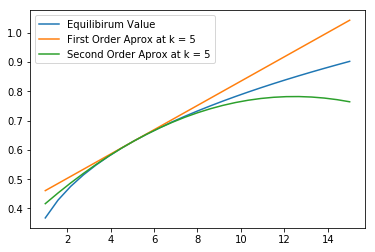

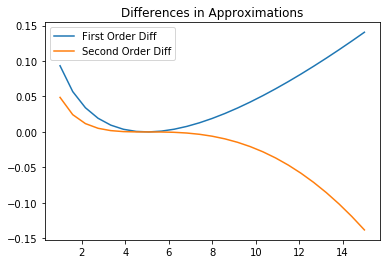

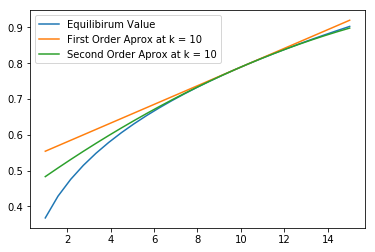

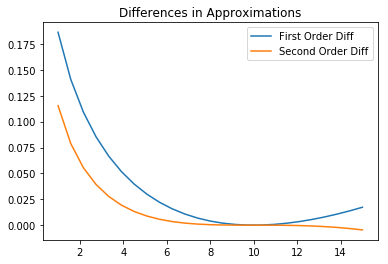

In [2]:
#initialize paramters
alpha = .33
k = 5
z = 1
b = 2
t = .1    
h = 24

#create kgrid
kgrid = np.linspace(1,15,25)

# variable functions
def labor_supply(w, pi, k):
    return h - (b/(w*(1 + b)))*(w*h + pi - t)

def labor_demand(w, k):
    return ((1 - alpha)*z/w)**(1/alpha)*k

def profit(w, nd, k):
    return z*k**alpha*nd**(1 - alpha) - w * nd

def get_w(k1):
    if k1 < 5:
        state_init = 0.3
    else:
        state_init  = 0.8
    args = (alpha, k1, z, b, t, h)
    return opt.fsolve(errors, state_init, args = args)[0]

def errors(state, *args):
    alpha, k, z, b, t, h = args
    nd = labor_demand(state, k)
    pi = profit(state, nd ,k)
    ns = labor_supply(state, pi, k)
    error = nd - ns
    return error

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

# initialise state
state_init = 0.8
k = 5
args = (alpha, k, z, b, t, h)
w = opt.fsolve(errors, state_init, args = args)[0]

f  = lambda x: get_w(x)
weq = np.zeros_like(kgrid)
wfirst = np.zeros_like(kgrid)
wsecond = np.zeros_like(kgrid)

# for k=5
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,5,kgrid[i])
    wsecond[i] = second_approx(f,5,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 5")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 5")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

# For k=10
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,10,kgrid[i])
    wsecond[i] = second_approx(f,10,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 10")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 10")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

### Exercise 3


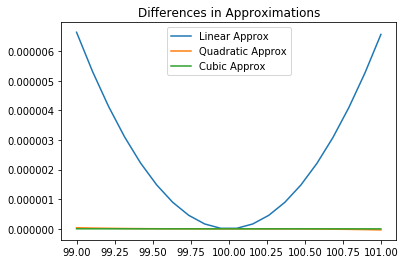

In [3]:
def f(y, *args):
    x, = args
    error = (((x ** 0.35) + 0.9 * x - y) ** (-2.5)) -\
            (0.95 * ((y ** 0.35 + 0.9 * y) ** (-2.5)))
    return error

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_deriv(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2 + \
            1/6* third_deriv(f,x0)*(x - x0) ** 3

x0 = 100
y0 = 49.2166
x = np.linspace(99,101,20)
y = np.repeat(49.,20)

g = lambda x: opt.fsolve(f, y0, args = x)

#actual y
for i in range(len(x)):
    y[i] = g(x[i])
#first order approx
lin = first_approx(g, x0, x)
#second order approx
quad = second_approx(g, x0, x)
#third order approx
cube = third_approx(g, x0, x)

diff1 = lin - y
diff2 = quad - y
diff3 = cube - y
plt.plot(x, diff1, label='Linear Approx')
plt.plot(x, diff2, label='Quadratic Approx')
plt.plot(x, diff3, label='Cubic Approx')
plt.title('Differences in Approximations')
plt.legend()
plt.show()

### Exercise 4


### Exercise 5


### Exercise 6
